### **I.Importation des bibliothèques**

In [170]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder,OneHotEncoder  

### **II.Chargement des données**

In [171]:
df=pd.read_csv('Student Depression Dataset.csv')

### **III. Préparation des données**

In [172]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


id. 	Identifiant unique de chaque étudiant (pas utile pour l’analyse)
Gender:	Sexe de l'étudiant : "Male" ou "Female"
Age	Âge de l'étudiant (en années)
City	Ville de résidence de l'étudiant
Profession	Profession actuelle (souvent "Student")
Academic Pressure	Niveau de pression académique (échelle numérique, par ex. de 1 à 5)
Work Pressure	Pression liée au travail (souvent 0 pour les étudiants non travailleurs)
CGPA	Moyenne générale des notes (Grade Point Average)
Study Satisfaction	Satisfaction vis-à-vis des études (valeurs numériques)
Job Satisfaction	Satisfaction vis-à-vis du travail (si applicable)
Sleep Duration	Durée moyenne du sommeil (ex: "5-6 hours", "7-8 hours")
Dietary Habits	Habitudes alimentaires : "Healthy", "Moderate", ou "Unhealthy"
Degree	Diplôme préparé (ex : BSc, BCA, M.Tech, etc.)
Have you ever had suicidal thoughts ?	Avez-vous déjà eu des pensées suicidaires ? ("Yes" ou "No")
Work/Study Hours	Nombre d’heures consacrées au travail ou aux études par jour
Financial Stress	Niveau de stress financier (échelle numérique)
Family History of Mental Illness	Antécédents familiaux de troubles mentaux ("Yes" ou "No")
Depression	✅ Cible (target) : L'étudiant souffre-t-il de dépression ? (1 = Oui, 0 = Non)


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [174]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [175]:
df['Financial Stress'].describe()

count    27898.000000
mean         3.139867
std          1.437347
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Financial Stress, dtype: float64

In [176]:
df['Financial Stress'].fillna(df['Financial Stress'].median(), inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_6384\955560206.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financial Stress'].fillna(df['Financial Stress'].median(), inplace=True)


In [177]:
df.duplicated().sum()

0

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139852,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437270,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


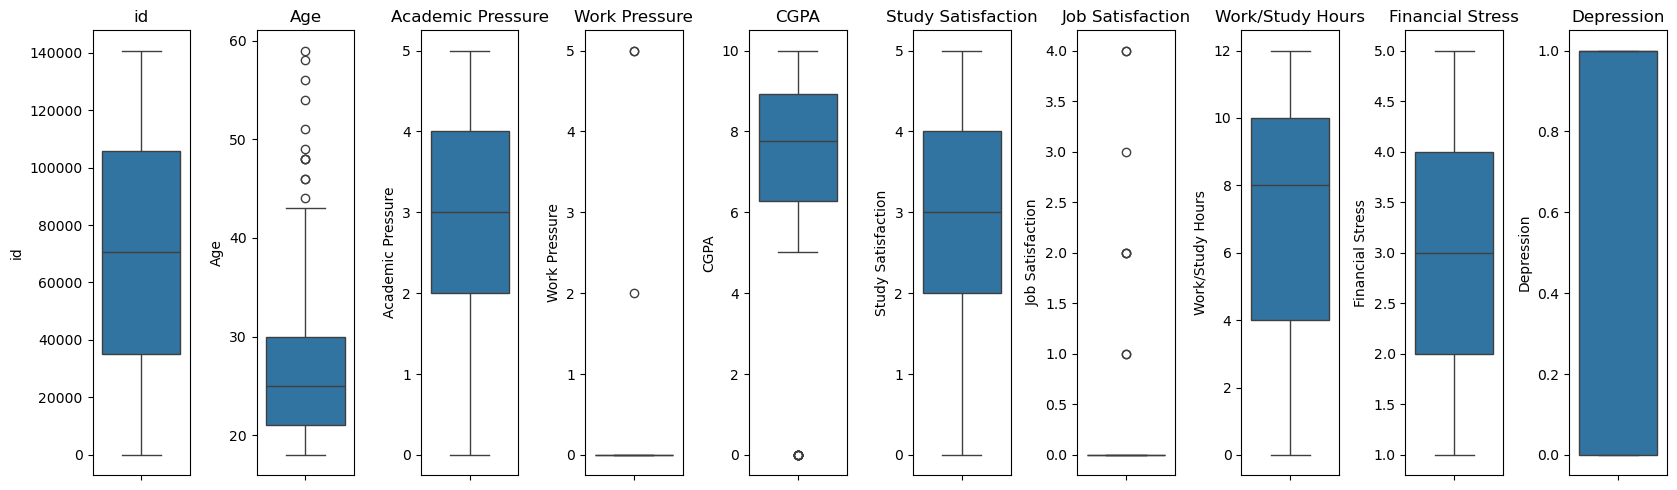

In [180]:
plt.figure(figsize=(30, 5))  # Ajuste la taille du graphique

for i, col in enumerate(df.select_dtypes(include='number').columns, 1,):
    plt.subplot(1, len(df.columns), i)  # Crée des sous-graphiques côte à côte
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()  # Ajuste les espacements=
plt.show()

In [181]:
df["Age"].max()

59.0

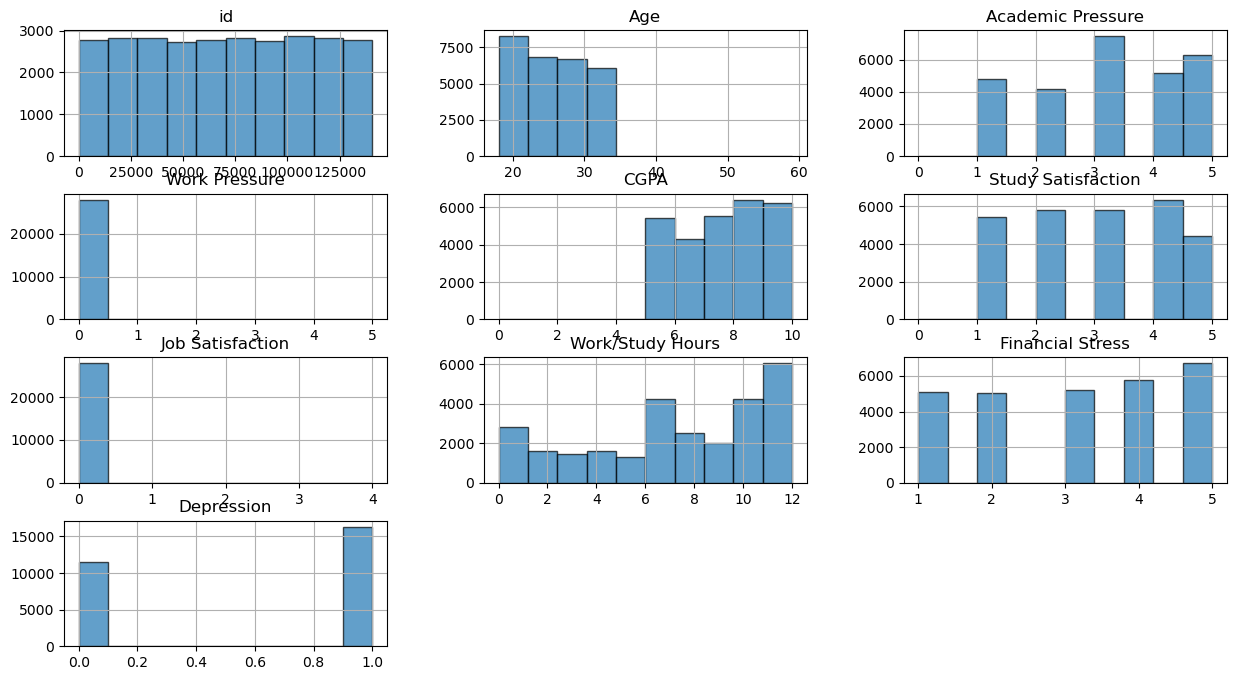

In [182]:
df.hist(edgecolor='black',alpha=0.7,figsize=(15,8))
plt.show()

### **Encodage des variables catégorielles**

In [183]:
df.select_dtypes(include=['object'])

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,Male,Visakhapatnam,Student,5-6 hours,Healthy,B.Pharm,Yes,No
1,Female,Bangalore,Student,5-6 hours,Moderate,BSc,No,Yes
2,Male,Srinagar,Student,Less than 5 hours,Healthy,BA,No,Yes
3,Female,Varanasi,Student,7-8 hours,Moderate,BCA,Yes,Yes
4,Female,Jaipur,Student,5-6 hours,Moderate,M.Tech,Yes,No
...,...,...,...,...,...,...,...,...
27896,Female,Surat,Student,5-6 hours,Unhealthy,Class 12,Yes,Yes
27897,Male,Ludhiana,Student,Less than 5 hours,Healthy,MSc,No,Yes
27898,Male,Faridabad,Student,5-6 hours,Unhealthy,MD,No,No
27899,Female,Ludhiana,Student,Less than 5 hours,Healthy,Class 12,Yes,No


## Gender

In [184]:
df['Gender'].value_counts()

Gender
Male      15547
Female    12354
Name: count, dtype: int64

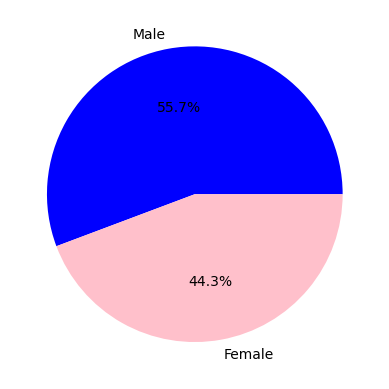

In [185]:
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].unique(),autopct='%1.1f%%',colors=['blue', 'pink'])
plt.show()

In [186]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [187]:
Encodage= LabelEncoder()
df['Gender'] = Encodage.fit_transform(df['Gender'])

## Profession

In [188]:
df['Profession'].value_counts()

Profession
Student                   27870
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

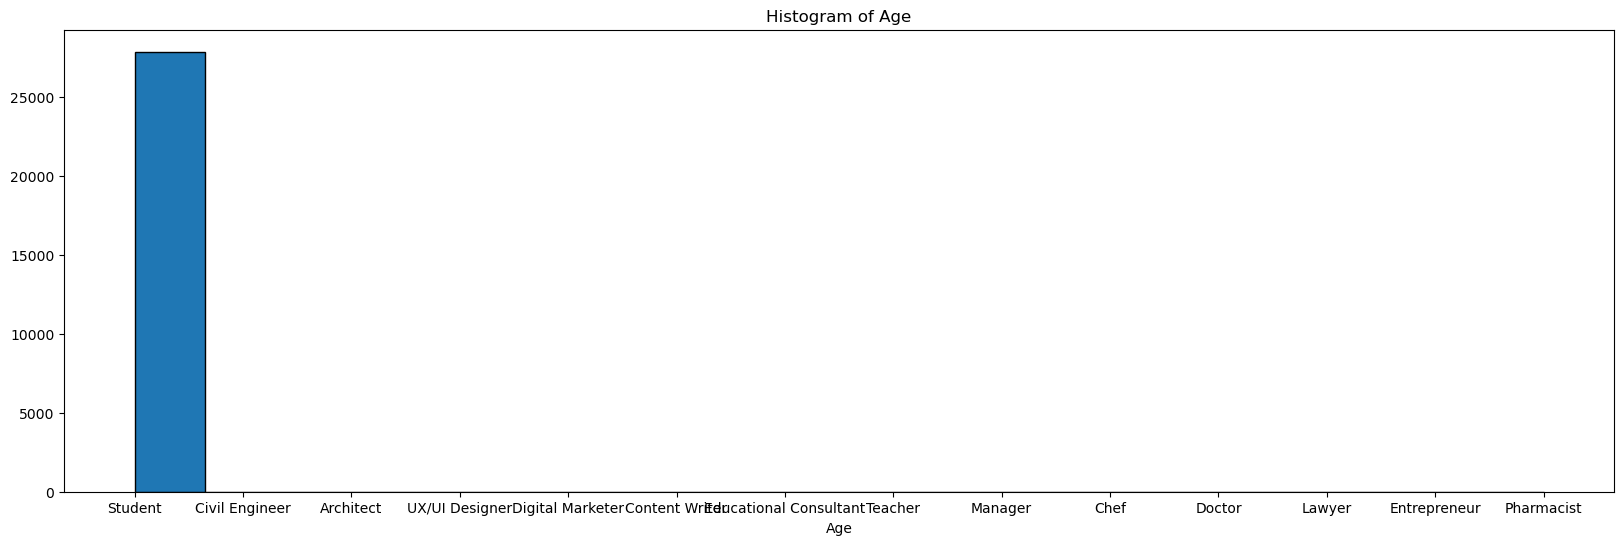

In [189]:
plt.figure(figsize=(20, 6))
plt.hist(df['Profession'], bins=20, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.show()

In [190]:
Encodage= LabelEncoder()
df['Profession'] = Encodage.fit_transform(df['Profession'])

## Sleep Duration

In [191]:
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    8310
7-8 hours            7346
5-6 hours            6183
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

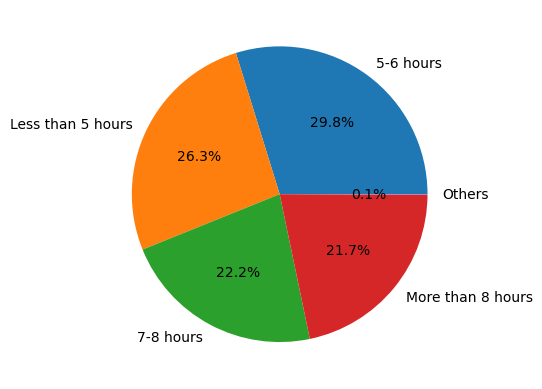

In [192]:
plt.pie(df['Sleep Duration'].value_counts(),labels=df['Sleep Duration'].unique(),autopct='%1.1f%%')
plt.show()

In [193]:
Encodage= LabelEncoder()
df['Sleep Duration'] = Encodage.fit_transform(df['Sleep Duration'])

## Dietary Habits

In [194]:
df['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64

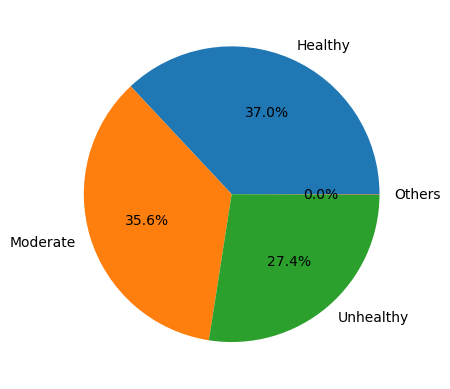

In [195]:
plt.pie(df['Dietary Habits'].value_counts(),labels=df['Dietary Habits'].unique(),autopct='%1.1f%%')
plt.show()

In [196]:
Encodage= LabelEncoder()
df['Dietary Habits'] = Encodage.fit_transform(df['Dietary Habits'])

## Degree	

In [197]:
df['Degree'].value_counts()

Degree
Class 12    6080
B.Ed        1867
B.Com       1506
B.Arch      1478
BCA         1433
MSc         1190
B.Tech      1152
MCA         1044
M.Tech      1022
BHM          925
BSc          888
M.Ed         821
B.Pharm      810
M.Com        734
MBBS         696
BBA          696
LLB          671
BE           613
BA           600
M.Pharm      582
MD           572
MBA          562
MA           544
PhD          522
LLM          482
MHM          191
ME           185
Others        35
Name: count, dtype: int64

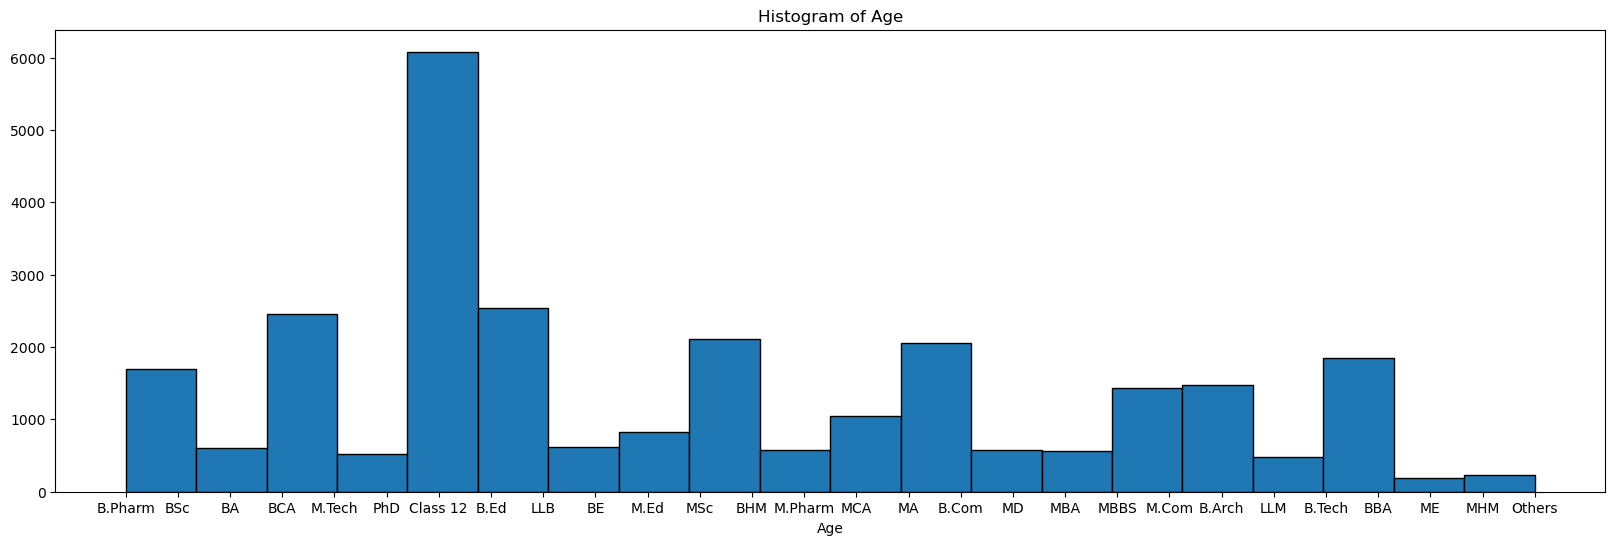

In [198]:
plt.figure(figsize=(20, 6))
plt.hist(df['Degree'], bins=20, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.show()

In [199]:
Encodage= LabelEncoder()
df['Degree'] = Encodage.fit_transform(df['Degree'])

## Have you ever had suicidal thoughts ?

In [200]:
df['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    17656
No     10245
Name: count, dtype: int64

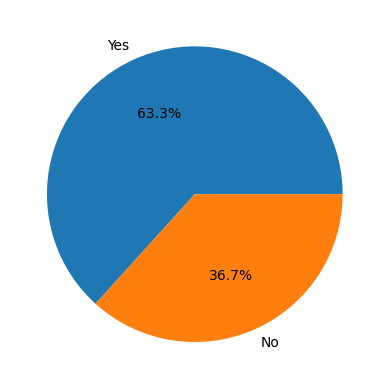

In [201]:
plt.pie(df['Have you ever had suicidal thoughts ?'].value_counts(),labels=df['Have you ever had suicidal thoughts ?'].unique(),autopct='%1.1f%%')
plt.show()

In [202]:
Encodage= LabelEncoder()
df['Have you ever had suicidal thoughts ?'] = Encodage.fit_transform(df['Have you ever had suicidal thoughts ?'])

## Family History of Mental Illness

In [203]:
df['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     14398
Yes    13503
Name: count, dtype: int64

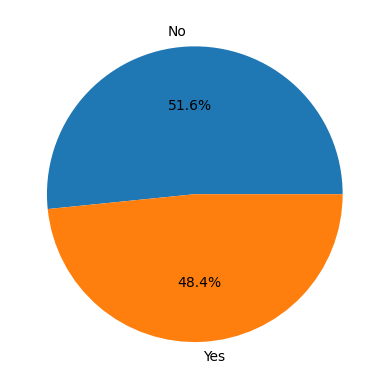

In [204]:
plt.pie(df['Family History of Mental Illness'].value_counts(),labels=df['Family History of Mental Illness'].unique(),autopct='%1.1f%%')
plt.show()

In [205]:
Encodage= LabelEncoder()
df['Family History of Mental Illness'] = Encodage.fit_transform(df['Family History of Mental Illness'])

In [206]:
from scipy import stats

def detect_outliers(df, column):
    z_scores = stats.zscore(df[column])
    threshold = 3
    outliers = df[np.abs(z_scores) > threshold][column]
    return outliers

def remove_outliers(df, column):
    z_scores = stats.zscore(df[column])
    threshold = 3
    new_df = df[np.abs(z_scores) < threshold]
    return new_df

In [207]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for i in numeric_cols:
    print(f"Colonne {i}: {detect_outliers(df, i).count()}")

Colonne id: 0
Colonne Gender: 0
Colonne Age: 19
Colonne Profession: 31
Colonne Academic Pressure: 0
Colonne Work Pressure: 3
Colonne CGPA: 9
Colonne Study Satisfaction: 0
Colonne Job Satisfaction: 8
Colonne Sleep Duration: 0
Colonne Dietary Habits: 0
Colonne Degree: 0
Colonne Have you ever had suicidal thoughts ?: 0
Colonne Work/Study Hours: 0
Colonne Financial Stress: 0
Colonne Family History of Mental Illness: 0
Colonne Depression: 0


# ***Partie : modele machine learning :***

## **LogisticRegression**

### **Séparation des features et du label** 

In [208]:
# Séparation des features et de la cible
X = df.drop(columns=['Depression', 'id',"City"])  
y = df['Depression']


### **Division des données pour l'entraînement et le test**

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Cette fonction divise les données en deux ensembles : un ensemble d'entraînement et un ensemble de test.

80% pour l'entraînement (X_train, y_train)

20% pour le test (X_test, y_test)

random_state=42 : pour rendre le tirage reproductible 

In [210]:
print(f"Taille du jeu d'entraînement : {X_train.shape}")
print(f"Taille du jeu de test : {X_test.shape}")

Taille du jeu d'entraînement : (22320, 15)
Taille du jeu de test : (5581, 15)


### **Normalisation des données**

In [211]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Normalisation : Transformation des données pour qu'elles aient une échelle comparable, ce qui est souvent nécessaire pour les modèles de machine learning. 


### **Modélisation et entraînement d’un modèle de classification**

 on utilise le modèle de régression logistique pour entraîner un modèle de classification
 - max_iter=1000 définit le nombre maximum d'itérations pour la convergence de l'algorithme d'optimisation. Si l'algorithme ne converge pas avant 1000 itérations, une erreur sera levée.

In [212]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [213]:
# Prédiction sur les données de test
y_pred = model.predict(X_test)

### **Visualisation des résultats**

###  Prédiction sur l'ensemble de test / visualisation :

In [214]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


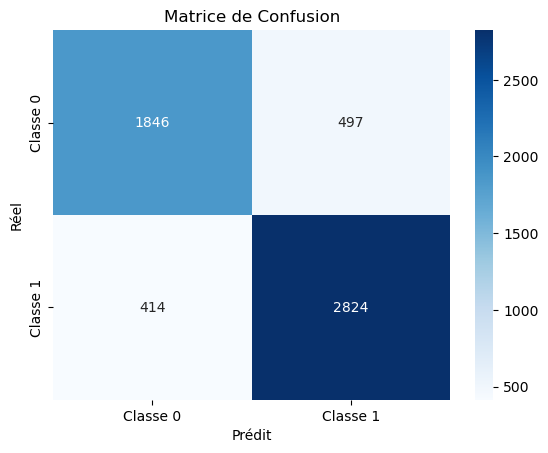

In [215]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()


In [216]:
# Calcul de la courbe ROC
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

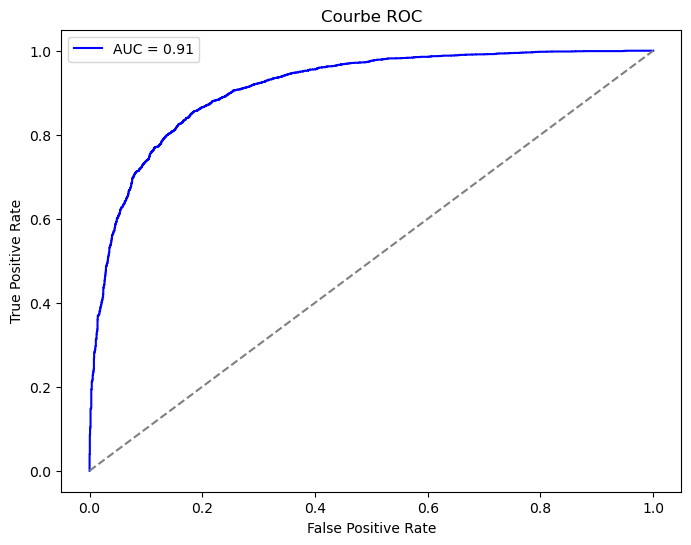

In [217]:
# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

In [218]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred))


Précision du modèle : 0.84

Rapport de classification :
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



## **Validation**

In [219]:
# Séparation des features et de la cible
X = df.drop(columns=['Depression', 'id',"City"])  
y = df['Depression']


In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [221]:
from sklearn.model_selection import cross_val_score,KFold

In [222]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(model,X,y,cv=kf)
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {scores.mean():.2f}")

Scores de validation croisée : [0.83694678 0.85143369 0.85232975 0.8374552  0.84982079]
Score moyen : 0.85


## **KNN**

###  separation des donnees / Division en train et test

In [223]:
# # Séparation des features et de la cible
X = df.drop(columns=['Depression', 'id',"City"])  
y = df['Depression']


In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###  Normalisation 

###  Modélisation et entraînement du modèle  :

In [225]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier()

- Le modèle utilisé ici est le KNeighborsClassifier de la bibliothèque sklearn.
   - Le nombre de voisins (n_neighbors=5) est spécifié pour l'algorithme K-Nearest Neighbors (KNN).
   - La fonction fit est utilisée pour entraîner le modèle en utilisant les données d'entraînement xk_train et yk_train.

###  Prédiction sur l'ensemble de test / visualisation :

In [226]:
#Prédiction sur les données de test
y_pred = knn.predict(X_test)

In [227]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


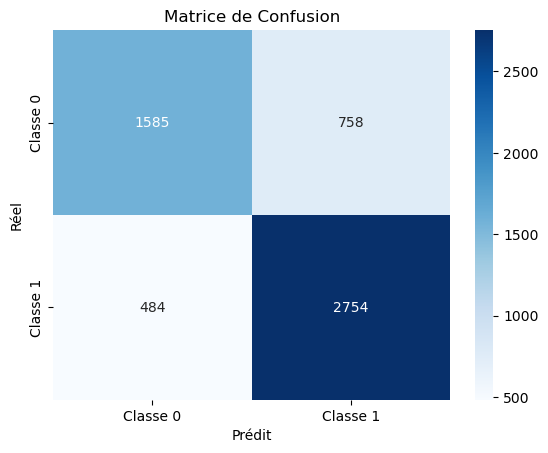

In [228]:


# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [229]:
# Calcul de la courbe ROC
y_scores = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

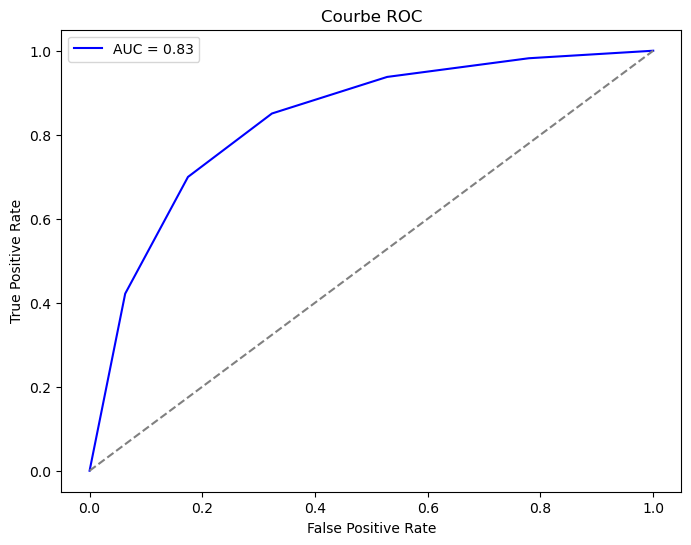

In [230]:
# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

In [231]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred))


Précision du modèle : 0.78

Rapport de classification :
               precision    recall  f1-score   support

           0       0.77      0.68      0.72      2343
           1       0.78      0.85      0.82      3238

    accuracy                           0.78      5581
   macro avg       0.78      0.76      0.77      5581
weighted avg       0.78      0.78      0.78      5581



In [232]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(knn,X,y,cv=kf)
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {scores.mean():.2f}")

Scores de validation croisée : [0.77763842 0.78154122 0.78548387 0.77921147 0.78530466]
Score moyen : 0.78


## **DecisionTreeClassifier**

In [233]:
# Séparation des features et de la cible
X = df.drop(columns=['Depression', 'id',"City"])  
y = df['Depression']


In [234]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [235]:
# Définition du modèle d'arbre de décision
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

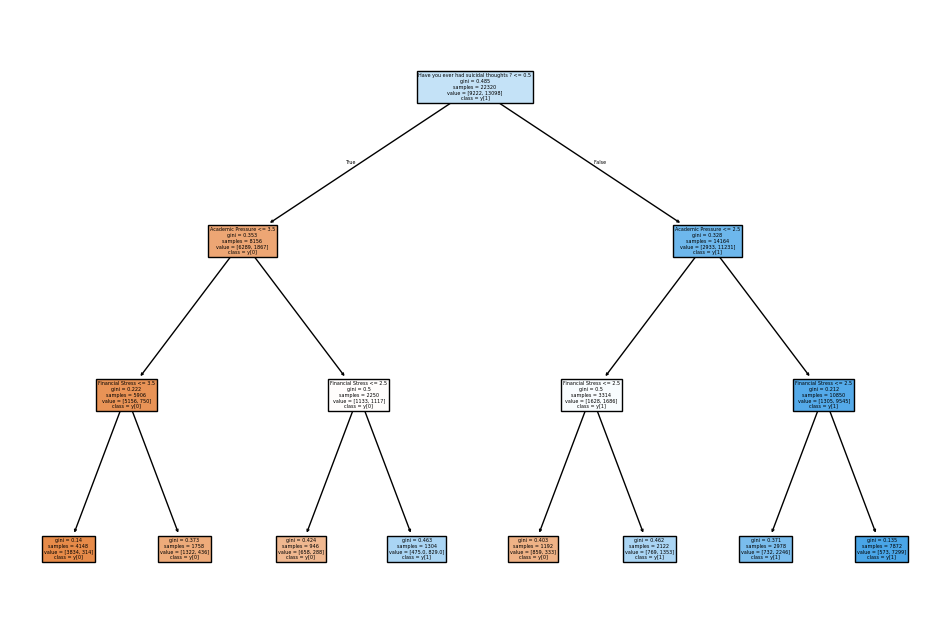

In [236]:
#Visualisation de l’arbre de décision
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=x_train.columns, class_names=True)
plt.show()


In [237]:

# Prédictions sur les données de test
y_pred = dt.predict(x_test)

In [238]:
# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle d'Arbre de Décision: {accuracy:.2f}")


Précision du modèle d'Arbre de Décision: 0.81


In [239]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred))

Précision du modèle : 0.81

Rapport de classification :
               precision    recall  f1-score   support

           0       0.81      0.71      0.76      2343
           1       0.81      0.88      0.84      3238

    accuracy                           0.81      5581
   macro avg       0.81      0.80      0.80      5581
weighted avg       0.81      0.81      0.81      5581



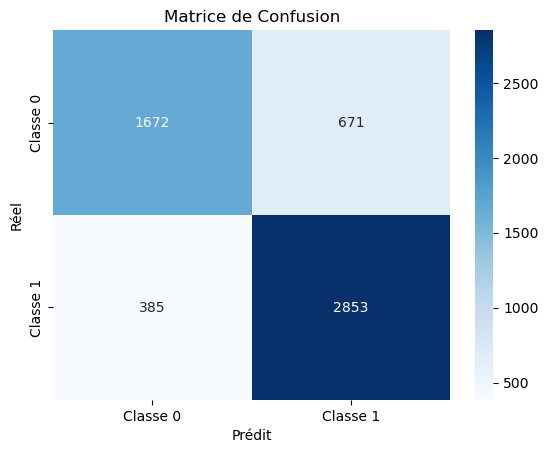

In [240]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [241]:
# Calcul de la courbe ROC
y_scores = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

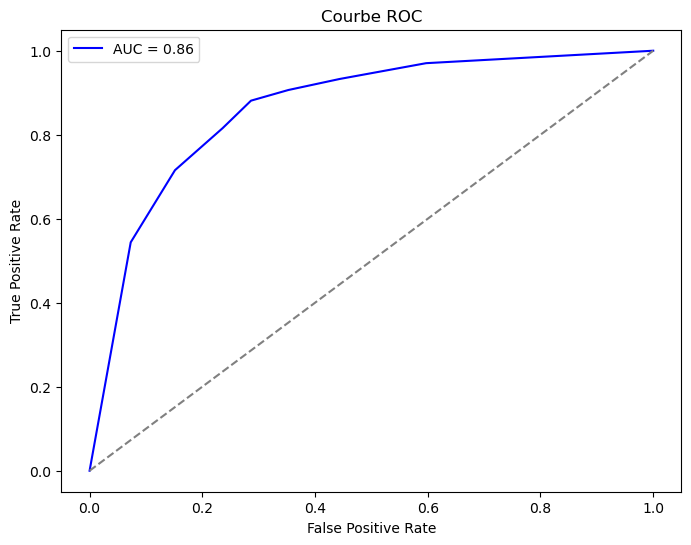

In [242]:
# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

In [243]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(dt,X,y,cv=kf)
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {scores.mean():.2f}")

Scores de validation croisée : [0.8107866  0.82311828 0.83189964 0.82078853 0.82168459]
Score moyen : 0.82


## **RandomForestClassifier**

In [244]:
# Séparation des features et de la cible
X = df.drop(columns=['Depression', 'id',"City"])  
y = df['Depression']


In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [246]:
# Création et entraînement du modèle Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=3, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [247]:
# Prédiction sur les données test
y_pred = rf_classifier.predict(X_test)

In [248]:
# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle RandomForestClassifier: {accuracy:.2f}")

Précision du modèle RandomForestClassifier: 0.82


In [249]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred))


Précision du modèle : 0.82

Rapport de classification :
               precision    recall  f1-score   support

           0       0.85      0.68      0.76      2343
           1       0.80      0.91      0.85      3238

    accuracy                           0.82      5581
   macro avg       0.82      0.80      0.80      5581
weighted avg       0.82      0.82      0.81      5581



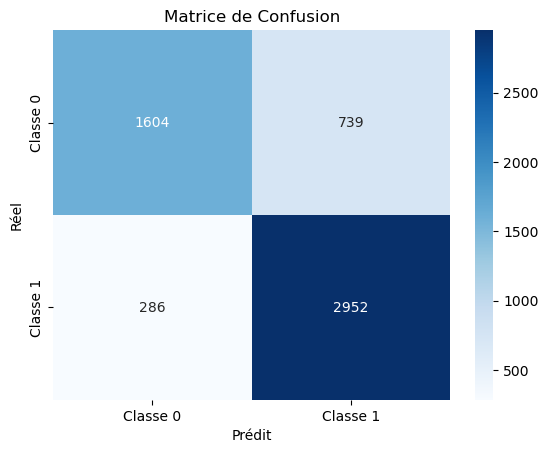

In [250]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [251]:
# Calcul de la courbe ROC
y_scores = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

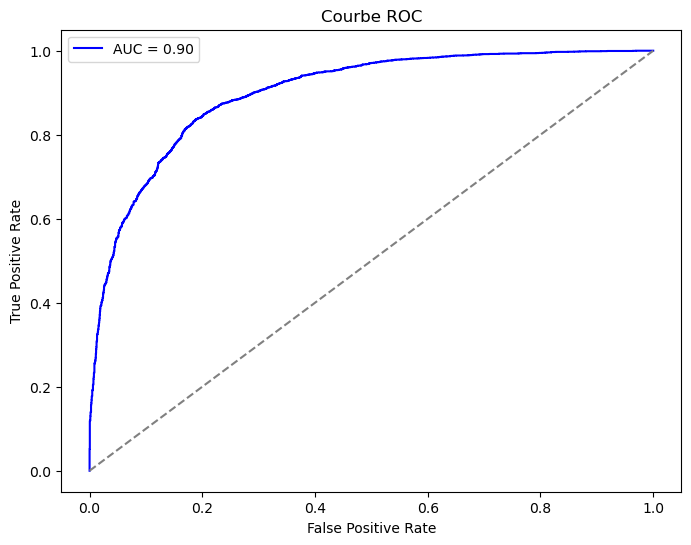

In [252]:
# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

In [253]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(rf_classifier,X,y,cv=kf)
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {scores.mean():.2f}")

Scores de validation croisée : [0.81705787 0.82921147 0.83315412 0.8265233  0.82741935]
Score moyen : 0.83


## **SVC**

In [254]:
# Séparation des features et de la cible
X = df.drop(columns=['Depression', 'id',"City"])  
y = df['Depression']


In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [256]:
from sklearn.svm import SVC
# Création et entraînement du modèle SVM avec un noyau linéaire
svm_classifier = SVC(kernel="rbf", C=1.0)
svm_classifier.fit(X_train, y_train)

SVC()

In [257]:
# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle RandomForestClassifier: {accuracy:.2f}")

Précision du modèle RandomForestClassifier: 0.82


In [258]:
y_pred = svm_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2343
           1       0.84      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



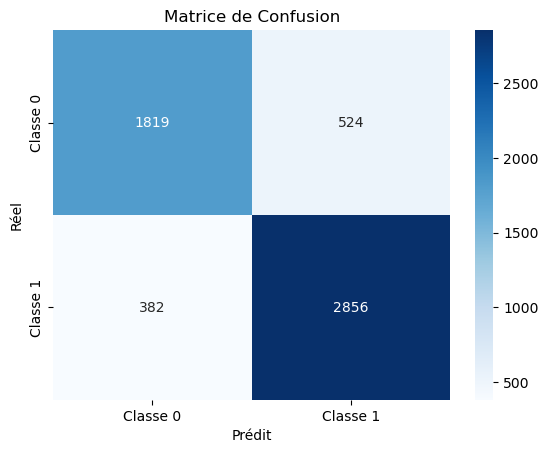

In [259]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [260]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(svm_classifier,X,y,cv=kf)
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {scores.mean():.2f}")

Scores de validation croisée : [0.8376635  0.84964158 0.85179211 0.83924731 0.85017921]
Score moyen : 0.85


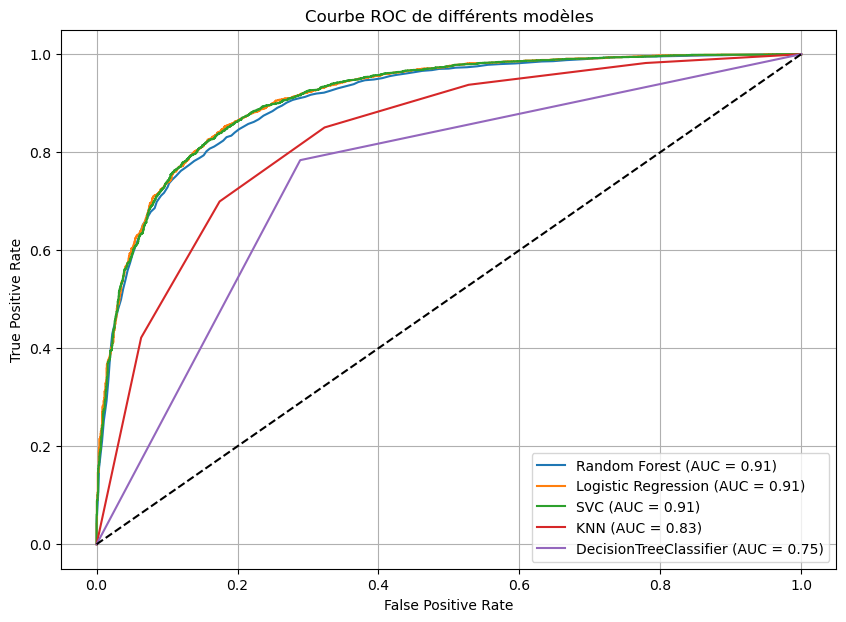

In [261]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier


models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "SVC": SVC(probability=True, class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier()
    #"Gradient Boosting": GradientBoostingClassifier()
}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Tracer la ligne de référence
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC de différents modèles')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## **Equilibreges de classes du varible cible**

Dans ce cas, les classes de la variable cible étaient initialement déséquilibrées, ce qui pouvait entraîner un apprentissage biaisé du modèle en faveur de la classe majoritaire. Pour corriger cela, nous avons utilisé la technique SMOTE (Synthetic Minority Over-sampling Technique), qui génère des exemples synthétiques de la classe minoritaire afin de rééquilibrer la distribution des classes

Après l'application de SMOTE, les deux classes présentent désormais une répartition équitable, ce qui permet au modèle d'apprentissage automatique d'apprendre de manière plus équilibrée et d'améliorer ses performances, notamment en termes de précision et de rappel pour la classe minoritaire.

##

## **KNN**

### Séparation des features et de la cible

In [262]:

X = df.drop(columns=['Depression', 'id',"City"])  
y = df['Depression']

In [263]:
print(X.columns)

Index(['Gender', 'Age', 'Profession', 'Academic Pressure', 'Work Pressure',
       'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')


###  Appliquer le sur-échantillonnage

In [264]:
from imblearn.over_sampling import SMOTE

# Initialiser SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)


X_resampled, y_resampled = smote.fit_resample(X,y)


In [265]:
X_trainK, X_testK, y_trainK, y_testK = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [266]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trainK = scaler.fit_transform(X_trainK)
X_testK = scaler.transform(X_testK)

In [267]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_trainK,y_trainK)

KNeighborsClassifier()

In [268]:
X_resampled.shape

(32672, 15)

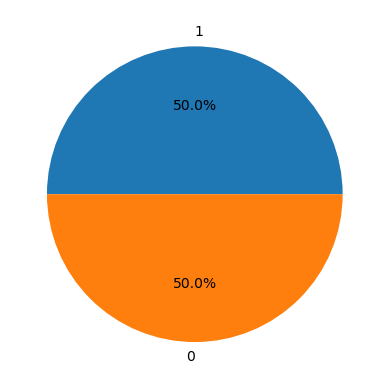

In [269]:
plt.pie(y_resampled.value_counts(),labels=df['Depression'].unique(),autopct='%1.1f%%')
plt.show()

### Prédiction sur les données de test


In [270]:
y_predK = knn.predict(X_testK)

In [271]:
accuracyknn = accuracy_score(y_testK, y_predK)
print(f"Accuracy knn: {accuracyknn:.2f}")

Accuracy knn: 0.84


###  Matrice de confusion


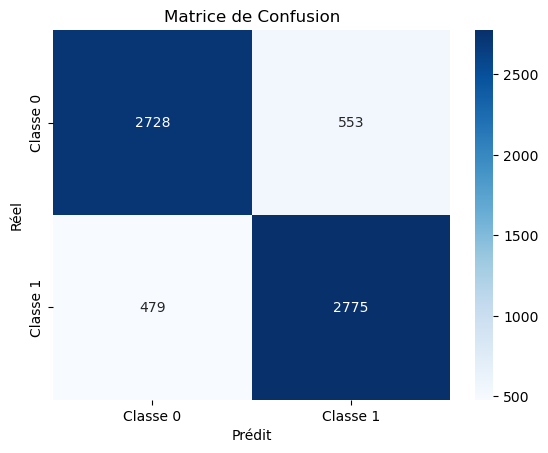

In [272]:


conf_matrixknn = confusion_matrix(y_testK, y_predK)
sns.heatmap(conf_matrixknn, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

### Calcul de la courbe ROC

In [273]:
y_scoresK = knn.predict_proba(X_testK)[:, 1]
fprk, tprk, _ = roc_curve(y_testK, y_scoresK)
roc_auck = auc(fprk, tprk)

### Affichage de la courbe ROC


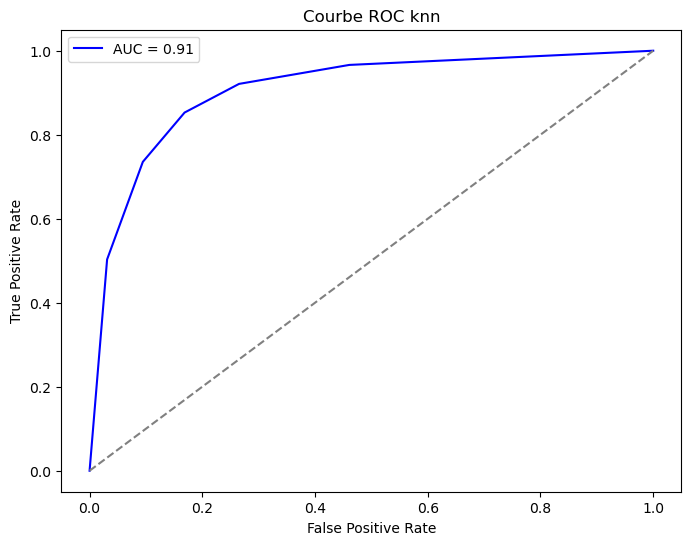

In [274]:
plt.figure(figsize=(8, 6))
plt.plot(fprk, tprk, color='blue', label=f'AUC = {roc_auck:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC knn')
plt.legend()
plt.show()

### Évaluation du modèle


In [275]:
accuracyknn = accuracy_score(y_testK, y_predK)
print(f"Précision du modèle knn : {accuracyknn:.2f}")
print("\nRapport de classification knn :\n", classification_report(y_testK, y_predK))


Précision du modèle knn : 0.84

Rapport de classification knn :
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      3281
           1       0.83      0.85      0.84      3254

    accuracy                           0.84      6535
   macro avg       0.84      0.84      0.84      6535
weighted avg       0.84      0.84      0.84      6535



## **LogisticRegression**

### Séparation des features et de la cible


In [276]:
X = df.drop(columns=['Depression', 'id',"City"])  
y = df['Depression']

In [277]:
from imblearn.over_sampling import SMOTE

# Initialiser SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Appliquer le sur-échantillonnage
X_resampled, y_resampled = smote.fit_resample(X,y)


In [278]:
X_trainL, X_testL, y_trainL, y_testL = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [279]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainL = scaler.fit_transform(X_trainL)
X_testL = scaler.transform(X_testL)

In [280]:
model = LogisticRegression(max_iter=1000)
model.fit(X_trainL, y_trainL)

LogisticRegression(max_iter=1000)

In [281]:
y_predL = model.predict(X_testL)

In [282]:
accuracyLogistic = accuracy_score(y_testL, y_predL)
print(f"Accuracy Logistic: {accuracyLogistic:.2f}")

Accuracy Logistic: 0.85


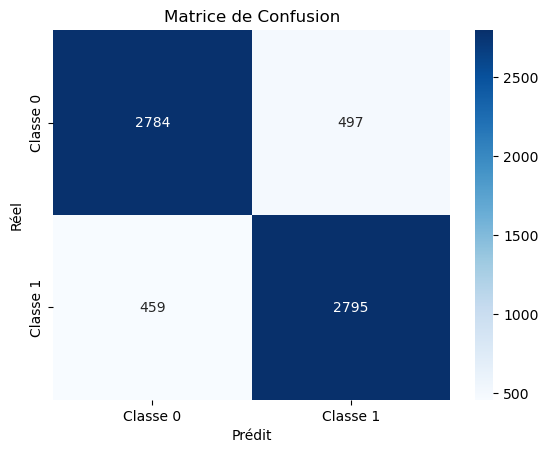

In [283]:
# Matrice de confusion
conf_matrixLogistic = confusion_matrix(y_testL, y_predL)
sns.heatmap(conf_matrixLogistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()


In [284]:
# Calcul de la courbe ROC
y_scoresL = model.predict_proba(X_testL)[:, 1]
fprL, tprL, _ = roc_curve(y_testL, y_scoresL)
roc_aucL = auc(fprL, tprL)

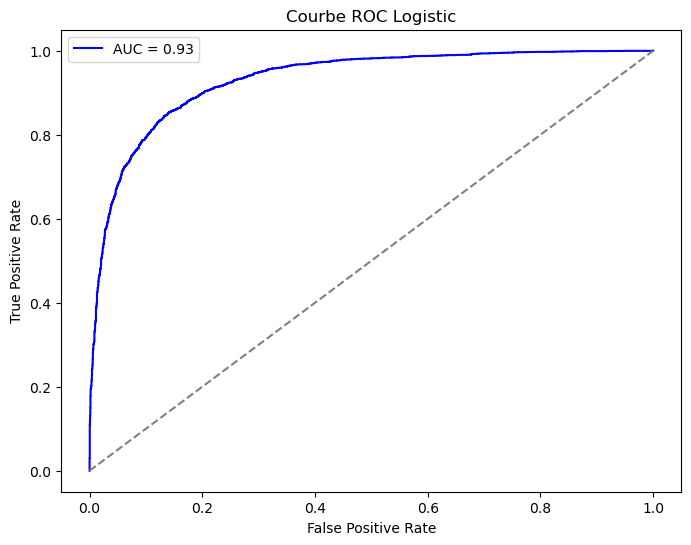

In [285]:
# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fprL, tprL, color='blue', label=f'AUC = {roc_aucL:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC Logistic')
plt.legend()
plt.show()

In [286]:
# Évaluation du modèle
accuracyLogistic= accuracy_score(y_testL, y_predL)
print(f"Précision du modèle Logistic : {accuracyLogistic:.2f}")
print("\nRapport de classification Logistic:\n", classification_report(y_testL, y_predL))

Précision du modèle Logistic : 0.85

Rapport de classification Logistic:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      3281
           1       0.85      0.86      0.85      3254

    accuracy                           0.85      6535
   macro avg       0.85      0.85      0.85      6535
weighted avg       0.85      0.85      0.85      6535



## **DecisionTreeClassifier**

In [287]:
# Séparation des features et de la cible
X = df.drop(columns=['Depression', 'id',"City"])  
y = df['Depression']

In [288]:
from imblearn.over_sampling import SMOTE

# Initialiser SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Appliquer le sur-échantillonnage
X_resampled, y_resampled = smote.fit_resample(X,y)


In [289]:
X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [290]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_trainDT = scaler.fit_transform(X_trainDT)
X_testDT = scaler.transform(X_testDT)

In [291]:
# Définition du modèle d'arbre de décision
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
dt.fit(X_trainDT, y_trainDT)

DecisionTreeClassifier(max_depth=5, random_state=42)

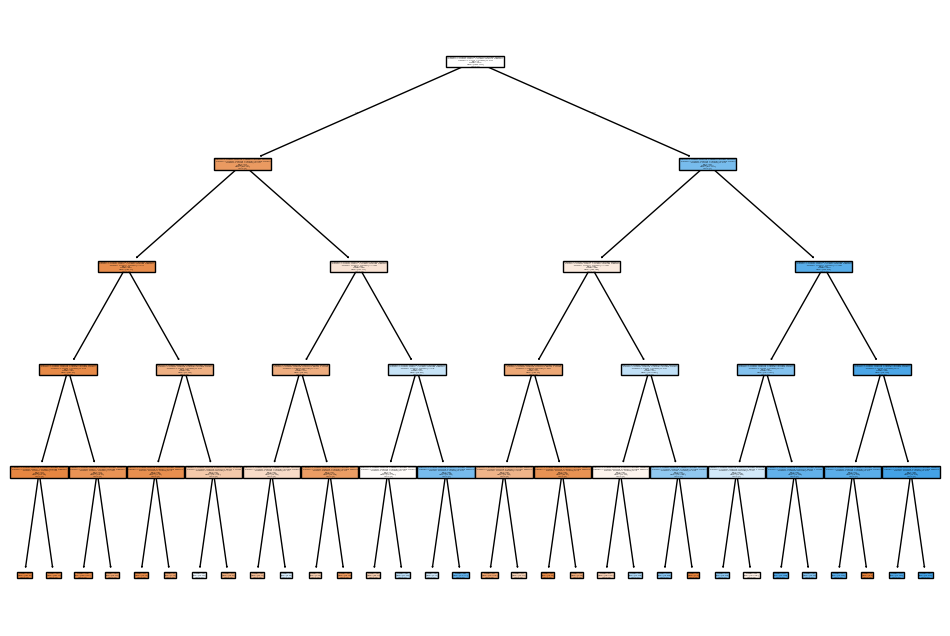

In [292]:
#Visualisation de l’arbre de décision
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=X_trainDT, class_names=True)
plt.show()


In [293]:

# Prédictions sur les données de test
y_predDT = dt.predict(X_testDT)

In [294]:
# Calcul de l'accuracy
accuracydt = accuracy_score(y_testDT, y_predDT)
print(f"Précision du modèle d'Arbre de Décision: {accuracydt:.2f}")


Précision du modèle d'Arbre de Décision: 0.84


In [295]:
# Évaluation du modèle
accuracydt = accuracy_score(y_testDT, y_predDT)
print(f"Précision du modèle : {accuracydt:.2f}")
print("\nRapport de classification dt :\n", classification_report(y_testDT, y_predDT))

Précision du modèle : 0.84

Rapport de classification dt :
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      3281
           1       0.84      0.85      0.84      3254

    accuracy                           0.84      6535
   macro avg       0.84      0.84      0.84      6535
weighted avg       0.84      0.84      0.84      6535



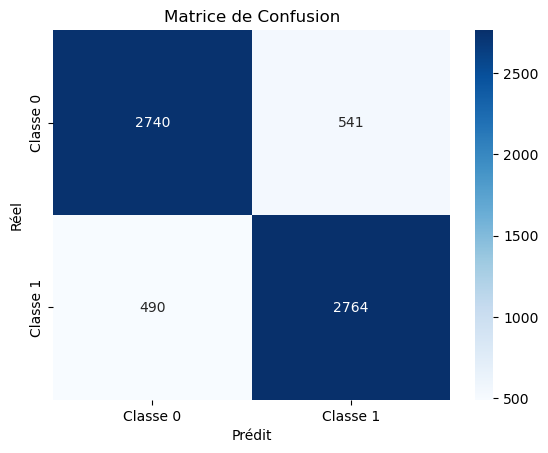

In [296]:
# Matrice de confusion
conf_matrixdt = confusion_matrix(y_testDT, y_predDT)
sns.heatmap(conf_matrixdt, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [297]:
# Calcul de la courbe ROC
y_scoresDT = dt.predict_proba(X_testDT)[:, 1]
fprdt, tprdt, _ = roc_curve(y_testDT, y_scoresDT)
roc_aucdt = auc(fprdt, tprdt)

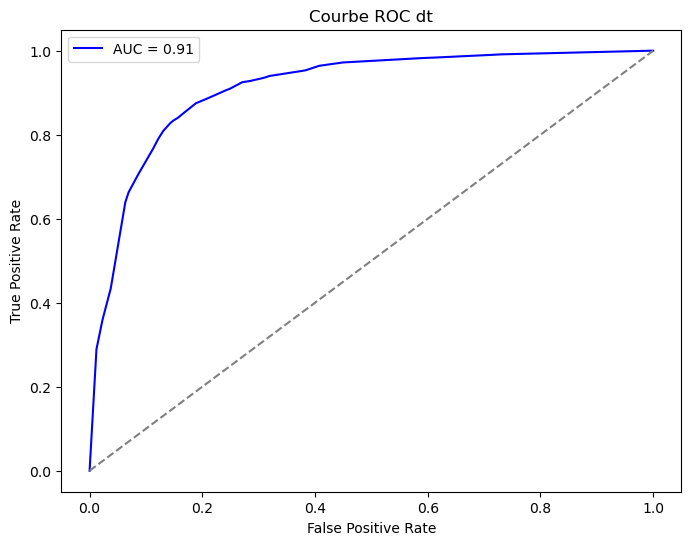

In [298]:
# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fprdt, tprdt, color='blue', label=f'AUC = {roc_aucdt:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC dt')
plt.legend()
plt.show()

In [299]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(dt,X_resampled,y_resampled,cv=kf)
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {scores.mean():.2f}")

Scores de validation croisée : [0.84223412 0.83121653 0.83914907 0.84358739 0.83868993]
Score moyen : 0.84


## **RandomForestClassifier**

In [300]:
# Séparation des features et de la cible
X = df.drop(columns=['Depression', 'id',"City"])  
y = df['Depression']

In [301]:
X.shape

(27901, 15)

In [302]:
from imblearn.over_sampling import SMOTE

# Initialiser SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Appliquer le sur-échantillonnage
X_resampled, y_resampled = smote.fit_resample(X,y)


In [303]:
X_trainR, X_testR, y_trainR, y_testR = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [304]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainR = scaler.fit_transform(X_trainR)
X_testR = scaler.transform(X_testR)

In [305]:
# #Création et entraînement du modèle Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=300, criterion="gini", max_depth=150, random_state=42)
rf_classifier.fit(X_trainR, y_trainR)

RandomForestClassifier(max_depth=150, n_estimators=300, random_state=42)

In [306]:
# Prédiction sur les données test
y_predR = rf_classifier.predict(X_testR)

In [307]:
# Calcul de l'accuracy
accuracyRandomForest = accuracy_score(y_testR, y_predR)
print(f"Précision du modèle RandomForestClassifier: {accuracyRandomForest:.2f}")

Précision du modèle RandomForestClassifier: 0.86


In [308]:
# Évaluation du modèle
accuracyRandomForest = accuracy_score(y_testR, y_predR)
print(f"Précision du modèle : {accuracyRandomForest:.2f}")
print("\nRapport de classification RandomForest :\n", classification_report(y_testR, y_predR))


Précision du modèle : 0.86

Rapport de classification RandomForest :
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      3281
           1       0.86      0.87      0.86      3254

    accuracy                           0.86      6535
   macro avg       0.86      0.86      0.86      6535
weighted avg       0.86      0.86      0.86      6535



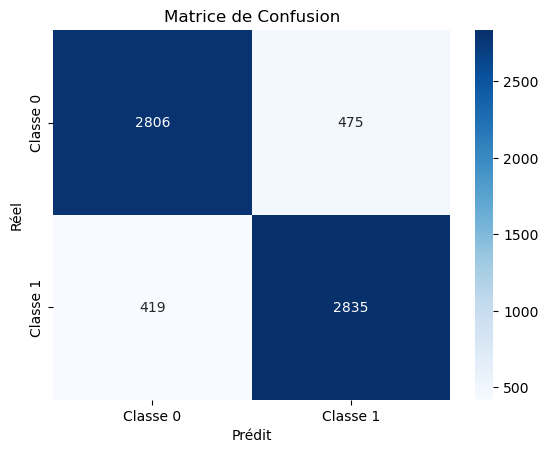

In [309]:
# Matrice de confusion
conf_matrixRandomForest = confusion_matrix(y_testR, y_predR)
sns.heatmap(conf_matrixRandomForest, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [310]:
# Calcul de la courbe ROC
y_scoresR = rf_classifier.predict_proba(X_testR)[:, 1]
fprR, tprR, _ = roc_curve(y_testR, y_scoresR)
roc_aucR = auc(fprR, tprR)

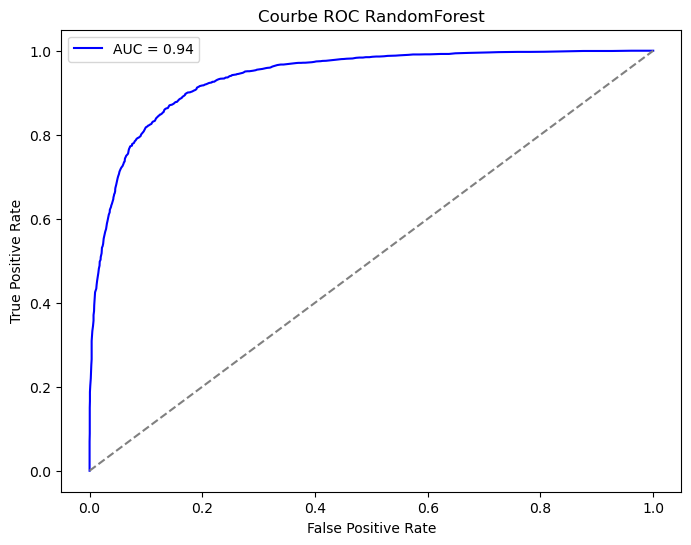

In [311]:
# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fprR, tprR, color='blue', label=f'AUC = {roc_aucR:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC RandomForest')
plt.legend()
plt.show()

In [312]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(rf_classifier,X_resampled,y_resampled,cv=kf)
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {scores.mean():.2f}")

Scores de validation croisée : [0.86472839 0.86090283 0.86730946 0.86730946 0.86868687]
Score moyen : 0.87


## **SVC**

In [313]:
# Séparation des features et de la cible
X = df.drop(columns=['Depression', 'id',"City"])  
y = df['Depression']

In [314]:
from imblearn.over_sampling import SMOTE

# Initialiser SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Appliquer le sur-échantillonnage
X_resampled, y_resampled = smote.fit_resample(X,y)


In [315]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [316]:
from sklearn.preprocessing import StandardScaler

# # # Exemple de données
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [317]:
# from sklearn.preprocessing import Normalizer
# # Exemple de données
# scaler = Normalizer()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [318]:
scaler = StandardScaler()
X_trainS = scaler.fit_transform(X_trainS)
X_testS = scaler.transform(X_testS)

In [319]:
from sklearn.svm import SVC
# Création et entraînement du modèle SVM avec un noyau linéaire
svm_classifier = SVC(kernel="rbf", C=1.0)
svm_classifier.fit(X_trainS, y_trainS)

SVC()

In [320]:
y_predS = svm_classifier.predict(X_testS)
print(classification_report(y_testS, y_predS))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      3281
           1       0.85      0.86      0.86      3254

    accuracy                           0.85      6535
   macro avg       0.85      0.85      0.85      6535
weighted avg       0.85      0.85      0.85      6535



In [321]:
# Calcul de l'accuracy
accuracySVC = accuracy_score(y_testS, y_predS)
print(f"Précision du modèle RandomForestClassifier: {accuracySVC:.2f}")

Précision du modèle RandomForestClassifier: 0.85


In [322]:
print(classification_report(y_testS, y_predS))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      3281
           1       0.85      0.86      0.86      3254

    accuracy                           0.85      6535
   macro avg       0.85      0.85      0.85      6535
weighted avg       0.85      0.85      0.85      6535



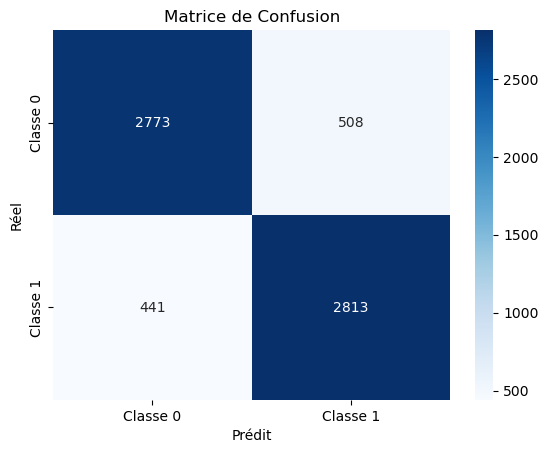

In [323]:
# Matrice de confusion
conf_matrixSVC = confusion_matrix(y_testS, y_predS)
sns.heatmap(conf_matrixSVC, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [324]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(svm_classifier,X_resampled,y_resampled,cv=kf)
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {scores.mean():.2f}")

Scores de validation croisée : [0.85462892 0.85524101 0.85613713 0.85430058 0.85690236]
Score moyen : 0.86


In [325]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,Visakhapatnam,11,5.0,0.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0,1
1,8,0,24.0,Bangalore,11,2.0,0.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1,0
2,26,1,31.0,Srinagar,11,3.0,0.0,7.03,5.0,0.0,2,0,5,0,9.0,1.0,1,0
3,30,0,28.0,Varanasi,11,3.0,0.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1,1
4,32,0,25.0,Jaipur,11,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,0,27.0,Surat,11,5.0,0.0,5.75,5.0,0.0,0,3,11,1,7.0,1.0,1,0
27897,140686,1,27.0,Ludhiana,11,2.0,0.0,9.40,3.0,0.0,2,0,25,0,0.0,3.0,1,0
27898,140689,1,31.0,Faridabad,11,3.0,0.0,6.61,4.0,0.0,0,3,22,0,12.0,2.0,0,0
27899,140690,0,18.0,Ludhiana,11,5.0,0.0,6.88,2.0,0.0,2,0,11,1,10.0,5.0,0,1


Accuracy knn: 0.84

Rapport de classification knn :
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      3281
           1       0.83      0.85      0.84      3254

    accuracy                           0.84      6535
   macro avg       0.84      0.84      0.84      6535
weighted avg       0.84      0.84      0.84      6535



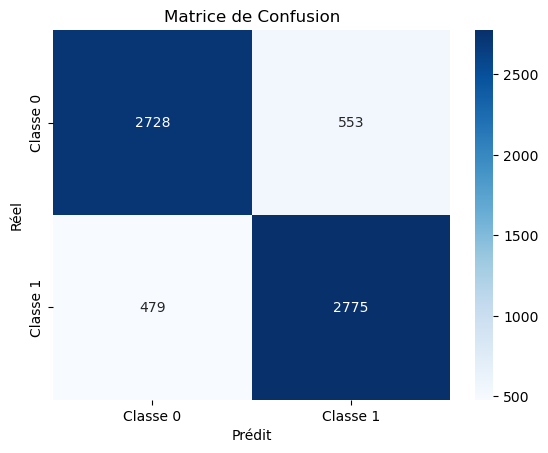

In [326]:
accuracyknn = accuracy_score(y_testK, y_predK)
print(f"Accuracy knn: {accuracyknn:.2f}")

print("\nRapport de classification knn :\n", classification_report(y_testK, y_predK))


# Matrice de confusion
conf_matrixknn = confusion_matrix(y_testK, y_predK)
sns.heatmap(conf_matrixknn, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

Accuracy Logistic: 0.85

Rapport de classification Logistic:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      3281
           1       0.85      0.86      0.85      3254

    accuracy                           0.85      6535
   macro avg       0.85      0.85      0.85      6535
weighted avg       0.85      0.85      0.85      6535



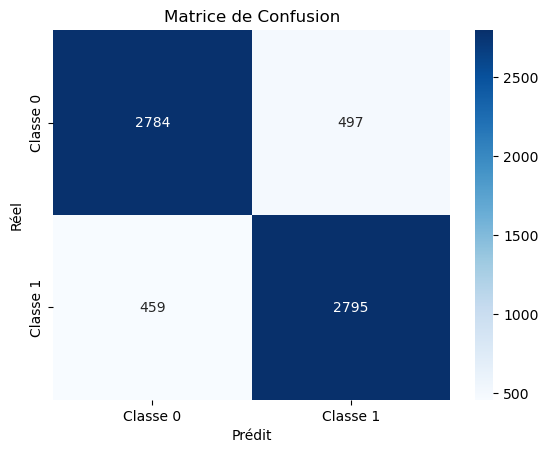

In [327]:
accuracyLogistic = accuracy_score(y_testL, y_predL)
print(f"Accuracy Logistic: {accuracyLogistic:.2f}")
print("\nRapport de classification Logistic:\n", classification_report(y_testL, y_predL))
 # Matrice de confusion
conf_matrixLogistic = confusion_matrix(y_testL, y_predL)
sns.heatmap(conf_matrixLogistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()



Précision du modèle d'Arbre de Décision: 0.84

Rapport de classification dt :
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      3281
           1       0.84      0.85      0.84      3254

    accuracy                           0.84      6535
   macro avg       0.84      0.84      0.84      6535
weighted avg       0.84      0.84      0.84      6535



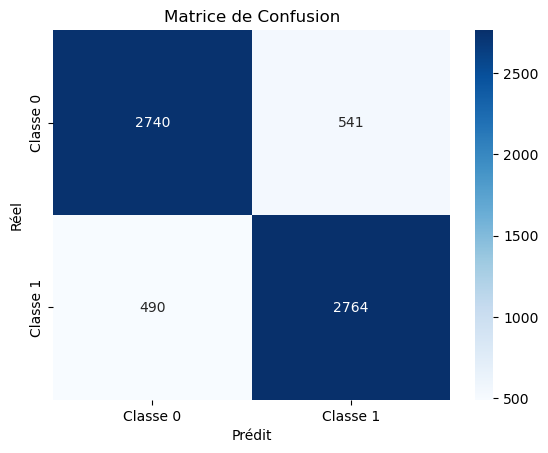

In [328]:
# Calcul de l'accuracy
accuracydt = accuracy_score(y_testDT, y_predDT)
print(f"Précision du modèle d'Arbre de Décision: {accuracydt:.2f}")
print("\nRapport de classification dt :\n", classification_report(y_testDT, y_predDT))
# Matrice de confusion
conf_matrixdt = confusion_matrix(y_testDT, y_predDT)
sns.heatmap(conf_matrixdt, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

Précision du modèle RandomForestClassifier: 0.86

Rapport de classification RandomForest :
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      3281
           1       0.86      0.87      0.86      3254

    accuracy                           0.86      6535
   macro avg       0.86      0.86      0.86      6535
weighted avg       0.86      0.86      0.86      6535



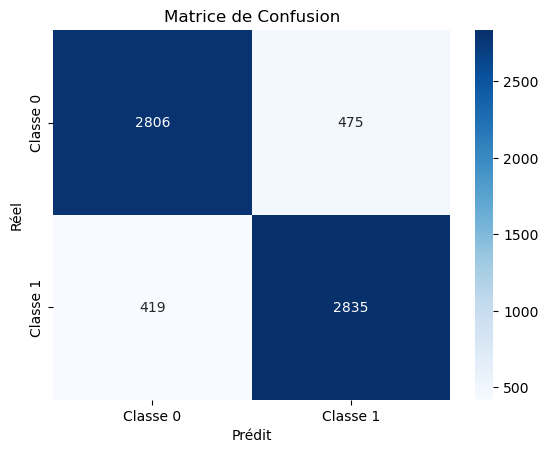

In [329]:
# Calcul de l'accuracy
accuracyRandomForest = accuracy_score(y_testR, y_predR)
print(f"Précision du modèle RandomForestClassifier: {accuracyRandomForest:.2f}")
print("\nRapport de classification RandomForest :\n", classification_report(y_testR, y_predR))

# Matrice de confusion
conf_matrixRandomForest = confusion_matrix(y_testR, y_predR)
sns.heatmap(conf_matrixRandomForest, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

Précision du modèle SVC: 0.85
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      3281
           1       0.85      0.86      0.86      3254

    accuracy                           0.85      6535
   macro avg       0.85      0.85      0.85      6535
weighted avg       0.85      0.85      0.85      6535



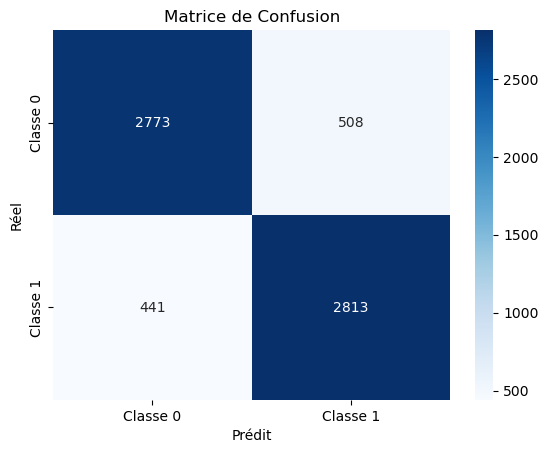

In [330]:
# Calcul de l'accuracy
accuracySVC = accuracy_score(y_testS, y_predS)
print(f"Précision du modèle SVC: {accuracySVC:.2f}")
print(classification_report(y_testS, y_predS))
# Matrice de confusion
conf_matrixSVC = confusion_matrix(y_testS, y_predS)
sns.heatmap(conf_matrixSVC, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

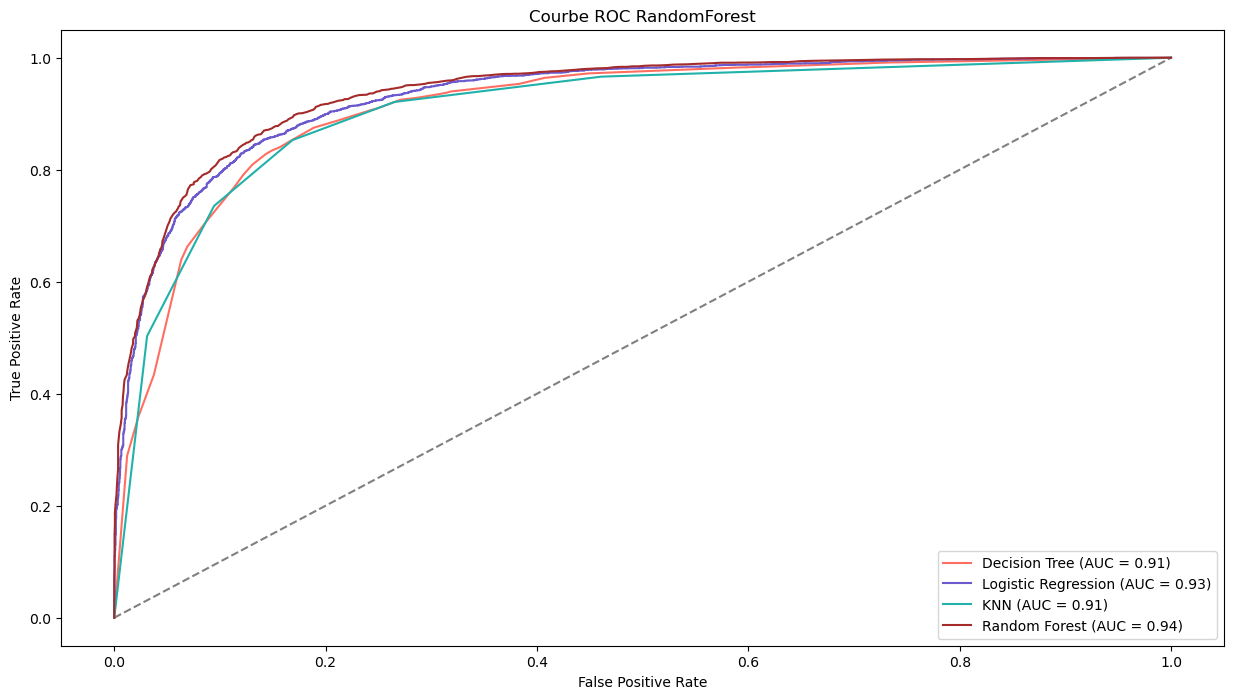

In [331]:
# Affichage de la courbe ROC
plt.figure(figsize=(15, 8))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.plot(fprdt, tprdt, color='#FF6F61', label=f'Decision Tree (AUC = {roc_aucdt:.2f})')       
plt.plot(fprL, tprL, color='#6A5ACD', label=f'Logistic Regression (AUC = {roc_aucL:.2f})')    
plt.plot(fprk, tprk, color='#20B2AA', label=f'KNN (AUC = {roc_auck:.2f})')                    
plt.plot(fprR, tprR, color='brown', label=f'Random Forest (AUC = {roc_aucR:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC RandomForest')
plt.legend()
plt.show()

In [332]:
print(f"Accuracy knn: {accuracyknn:.2f}")
print(f"Accuracy Logistic: {accuracyLogistic:.2f}")
print(f"Précision du modèle d'Arbre de Décision: {accuracydt:.2f}")
print(f"Précision du modèle RandomForestClassifier: {accuracyRandomForest:.2f}")
print(f"Précision du modèle SVC: {accuracySVC:.2f}")


Accuracy knn: 0.84
Accuracy Logistic: 0.85
Précision du modèle d'Arbre de Décision: 0.84
Précision du modèle RandomForestClassifier: 0.86
Précision du modèle SVC: 0.85


# conclusion : 
#### Ce projet montre qu’un modèle de Machine Learning permet de détecter les clients susceptibles de quitter une banque.
#### Et le meilleur modele utiliser est **RandomForest** , car il donne des predictions correctes

## ***Prediction du modele le plus perforemant***:

### ***Random Forest***

In [333]:
rf_classifier.predict([[10000		,	792,	0	,28	,4,	130142.79	,1	,1	,0	,38190.78	,	3.407613,	0.137931	,True	,False,	False]])

array([1], dtype=int64)

In [334]:
rf_classifier.predict([[9999	,		772	,1	,42	,3	,75075.31	,2	,1	,0	,92888.52	,	0.808222,	0.069767,	False,	True	,False]])

array([1], dtype=int64)

## Enregistrement du meilleur modele :

In [335]:
import joblib
joblib.dump(rf_classifier,'bestmodel.joblib')

['bestmodel.joblib']

### Prediction avec le modele engistrer

In [336]:
B_MODEL=joblib.load('bestmodel.joblib')
B_MODEL.predict([[9999	,772	,1	,42	,3	,75075.31	,2	,1	,0	,92888.52	,	0.808222,	0.069767,	False,	True	,False]])

array([1], dtype=int64)